In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
# Przykładowy obraz ze zbioru treningowego

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
# To samo, tylko jako faktyczny obrazek

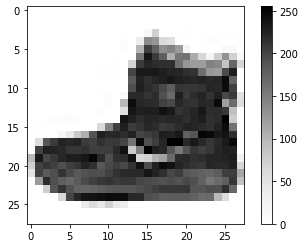

In [11]:
plt.figure()
plt.imshow(X_train[0], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Klasa dla obrazu powyżej  

In [13]:
y_train[0]

9

In [14]:
# Jeszcze jeden przykład

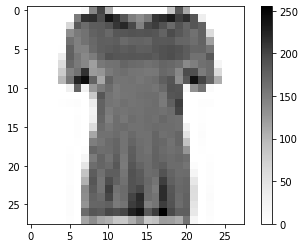

In [15]:
plt.imshow(X_train[10], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
y_train[10]

0

In [17]:
# https://github.com/zalandoresearch/fashion-mnist

mapa_kategorii = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

In [18]:
mapa_kategorii[y_train[10]]

'T-shirt/top'

In [19]:
# Skalowanie i normalizacja

In [20]:
X_train = X_train/255.0

In [21]:
y_train = y_train.astype(np.int32) 

In [22]:
# Budowanie modelu

In [23]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [24]:
# Szkolenie przez 2 epoki, tj dwukrotne przejście przez zbiór uczący

In [26]:
model.fit(X_train, y_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4372 - accuracy: 0.8503
Epoch 2/2
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4225 - accuracy: 0.8558


In [27]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Loss :", loss)
print("Accuracy :", accuracy)

60000/1 - 3s - loss: 0.4381 - accuracy: 0.8581
Loss : 0.4107960105141004
Accuracy : 0.8581


In [28]:
X_test = X_test/255.0

In [29]:
y_test = y_test.astype(np.int32)

In [30]:
# Przewidywanie zbioru testowego

In [31]:
y_pred = model.predict(X_test, steps = 10)
print(y_pred.shape)

(10000, 10)


In [32]:
y_pred[0]

array([1.1324629e-06, 6.2387386e-07, 3.0684598e-05, 1.5558431e-05,
       2.8617802e-05, 1.7403202e-01, 7.1332732e-05, 1.4936620e-01,
       1.1253842e-02, 6.6520000e-01], dtype=float32)

In [33]:
# Predyklcja zawiera wektor - prawdopodobieństwo przynależności do każdej z klas. Sprawdźmy która klasa ma największe prawdopodobieństwo.

In [34]:
np.argmax(y_pred[0])

9

In [35]:
mapa_kategorii[np.argmax(y_pred[0])]

'Ankle boot'

In [36]:
mapa_kategorii[y_test[0]]

'Ankle boot'

In [37]:
# Pierwszy element to (u mnie) półbut. Czy tak jest naprawdę?

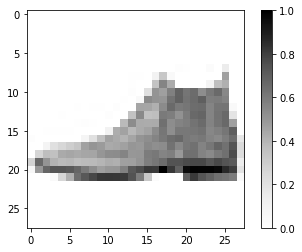

In [38]:
plt.imshow(X_test[0], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
# Sprawdźmy jeszcze prawdopodobieństwa dla predykcji

(0, 1)

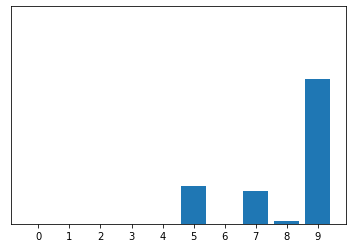

In [40]:
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10), y_pred[0])
plt.ylim([0, 1])

In [41]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Loss :", loss)
print("Accuracy :", accuracy)

10000/1 - 1s - loss: 0.4378 - accuracy: 0.8410
Loss : 0.4595955235481262
Accuracy : 0.841


In [42]:
# Dodatek 1: Mapy aktywacji

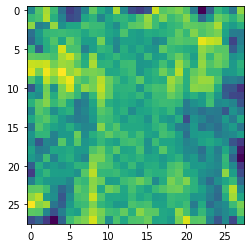

In [43]:
nr_kategorii = 0
mapa_aktywacji = []
for elem in model.weights[0].numpy():
    mapa_aktywacji.append(elem[nr_kategorii])
    
plt.imshow(np.array(mapa_aktywacji).reshape((28, 28)))

In [44]:
# Dodatek 2: Własny przykład

In [45]:
def decode_img(filepath):
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [28, 28])

In [52]:
lista_plikow = tf.data.Dataset.list_files(str('C:/Users/rafal.bieganski/Pictures/grafiki_na_test/test*'))

In [53]:
moj_test = lista_plikow.map(decode_img)

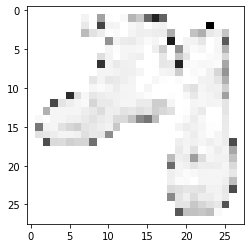

In [70]:
obraz = None
for elem in moj_test.take(2):
    obraz = elem.numpy()

plt.imshow(obraz.reshape(28, 28), cmap='Greys')
plt.show()

#dla for elem in moj_test.take(1): rozpoznaje nawet dobrze ale dla 
# for elem in moj_test.take(2) już buty rozpoznaje jako tshirt :) 



In [71]:
y_pred_moj = model.predict(obraz.reshape(1, 784))

In [72]:
y_pred_moj

array([[0.27459216, 0.04239709, 0.17351967, 0.2023614 , 0.03161811,
        0.05567182, 0.05068776, 0.01772826, 0.13511367, 0.01631011]],
      dtype=float32)

In [73]:
mapa_kategorii[np.argmax(y_pred_moj)]

'T-shirt/top'

(0, 1)

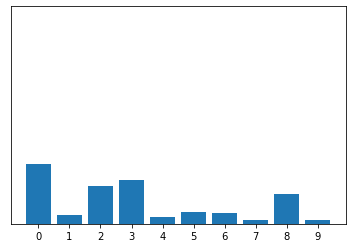

In [74]:
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10), y_pred_moj[0])
plt.ylim([0, 1])

In [59]:
# Zadanie: zrób lub znajdź zdjęcie ubioru, wczytaj jak powyżej a następnie dokonaj predykcji na tym zdjęciu

Dodatek 3:

Przykładowa prosta sieć konwolucyjna.

In [60]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)


In [75]:
model2.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 21s 346us/sample - loss: 0.2932 - accuracy: 0.8969
Epoch 2/2
60000/60000 [==============================] - 21s 352us/sample - loss: 0.2742 - accuracy: 0.9025


In [76]:
for weight in model2.weights:
    print(weight.shape)

(3, 3, 1, 32)
(32,)
(2592, 10)
(10,)
